# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

count = 1
set_count = 1
index = 0

weather_df = pd.DataFrame({'City': [],
                           'Cloudiness':[],
                           'Country':[],
                           'Date':[],
                           'Humidity':[],
                           'Lat':[],
                           'Lng':[],
                           'Max Temp':[],
                           'Wind Speed':[]
                          })

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units

    weather = requests.get(query_url).json()
    
    try:
        time.sleep(1)
        print(f"Processing Record {count} of Set {set_count} | {city}.")
        count += 1
        
        weather_df.loc[index, 'City'] = weather['name']
        weather_df.loc[index, 'Cloudiness'] = weather['clouds']['all']
        weather_df.loc[index, 'Country'] = weather['sys']['country']
        weather_df.loc[index, 'Date'] = int(time.time())
        weather_df.loc[index, 'Humidity'] = weather['main']['humidity']
        weather_df.loc[index, 'Lat'] = weather['coord']['lat']
        weather_df.loc[index, 'Lng'] = weather['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = weather['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = weather['wind']['speed']
        
        index += 1
        if count == 51:
            count -= 50
            set_count += 1
            
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | grand river south east.
City not found. Skipping...
Processing Record 2 of Set 1 | qaanaaq.
Processing Record 3 of Set 1 | luderitz.
Processing Record 4 of Set 1 | jamestown.
Processing Record 5 of Set 1 | abu samrah.
Processing Record 6 of Set 1 | lata.
Processing Record 7 of Set 1 | emba.
Processing Record 8 of Set 1 | pevek.
Processing Record 9 of Set 1 | chokurdakh.
Processing Record 10 of Set 1 | busselton.
Processing Record 11 of Set 1 | cooma.
Processing Record 12 of Set 1 | thompson.
Processing Record 13 of Set 1 | ardistan.
City not found. Skipping...
Processing Record 14 of Set 1 | butaritari.
Processing Record 15 of Set 1 | erzin.
Processing Record 16 of Set 1 | port alfred.
Processing Record 17 of Set 1 | ornskoldsvik.
Processing Record 18 of Set 1 | rio grande.
Processing Record 19 of Set 1 | new norfolk.
Processing Record 20 of Set 1 | kapaa.
Processing Record 21 of Set 1 | hermanus.
Pro

Processing Record 31 of Set 4 | pucallpa.
Processing Record 32 of Set 4 | lebu.
Processing Record 33 of Set 4 | mangan.
Processing Record 34 of Set 4 | pichayevo.
Processing Record 35 of Set 4 | cherskiy.
Processing Record 36 of Set 4 | guajara-mirim.
City not found. Skipping...
Processing Record 37 of Set 4 | castro.
Processing Record 38 of Set 4 | torbay.
Processing Record 39 of Set 4 | inhambane.
Processing Record 40 of Set 4 | tres arroyos.
Processing Record 41 of Set 4 | naze.
Processing Record 42 of Set 4 | dukat.
Processing Record 43 of Set 4 | paradwip.
City not found. Skipping...
Processing Record 44 of Set 4 | vila velha.
Processing Record 45 of Set 4 | kahama.
Processing Record 46 of Set 4 | preili.
Processing Record 47 of Set 4 | pochutla.
Processing Record 48 of Set 4 | longyan.
Processing Record 49 of Set 4 | coihaique.
Processing Record 50 of Set 4 | ulagan.
Processing Record 1 of Set 5 | husavik.
Processing Record 2 of Set 5 | east london.
Processing Record 3 of Set 5 |

Processing Record 10 of Set 8 | san miguel.
Processing Record 11 of Set 8 | padang.
Processing Record 12 of Set 8 | cabo san lucas.
Processing Record 13 of Set 8 | narsaq.
Processing Record 14 of Set 8 | artyk.
City not found. Skipping...
Processing Record 15 of Set 8 | pitimbu.
Processing Record 16 of Set 8 | college.
Processing Record 17 of Set 8 | alekseyevsk.
Processing Record 18 of Set 8 | guerrero negro.
Processing Record 19 of Set 8 | tambo.
Processing Record 20 of Set 8 | cururupu.
Processing Record 21 of Set 8 | sur.
Processing Record 22 of Set 8 | praya.
Processing Record 23 of Set 8 | grindavik.
Processing Record 24 of Set 8 | deming.
Processing Record 25 of Set 8 | durango.
Processing Record 26 of Set 8 | tautira.
Processing Record 27 of Set 8 | paka.
Processing Record 28 of Set 8 | galle.
Processing Record 29 of Set 8 | georgiyevka.
Processing Record 30 of Set 8 | tual.
Processing Record 31 of Set 8 | nandu.
Processing Record 32 of Set 8 | scottsburgh.
City not found. Skip

Processing Record 46 of Set 11 | sumbawa.
City not found. Skipping...
Processing Record 47 of Set 11 | pringsewu.
Processing Record 48 of Set 11 | lerwick.
Processing Record 49 of Set 11 | smithers.
Processing Record 50 of Set 11 | honiara.
Processing Record 1 of Set 12 | omboue.
Processing Record 2 of Set 12 | camargo.
Processing Record 3 of Set 12 | dar es salaam.
Processing Record 4 of Set 12 | careiro da varzea.
Processing Record 5 of Set 12 | nioki.
Processing Record 6 of Set 12 | leningradskiy.
Processing Record 7 of Set 12 | huai mek.
Processing Record 8 of Set 12 | sabha.
Processing Record 9 of Set 12 | mackenzie.
Processing Record 10 of Set 12 | iskateley.
Processing Record 11 of Set 12 | leshukonskoye.
Processing Record 12 of Set 12 | znamensk.
Processing Record 13 of Set 12 | bowen.
Processing Record 14 of Set 12 | minab.
Processing Record 15 of Set 12 | preobrazheniye.
Processing Record 16 of Set 12 | sedelnikovo.
City not found. Skipping...
Processing Record 17 of Set 12 |

In [4]:
weather_df[['Cloudiness','Date','Humidity']] = weather_df[['Cloudiness','Date','Humidity']].applymap(np.int64)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,0,GL,1550869022,88,77.48,-69.36,-21.55,6.76
1,Luderitz,0,NA,1550869027,78,-26.65,15.16,64.59,14.25
2,Jamestown,0,AU,1550869029,72,-33.21,138.60,56.49,7.76
3,Abu Samrah,44,SY,1550869040,94,35.30,37.18,44.61,4.52
4,Lata,8,IN,1550869041,76,30.78,78.62,28.95,2.62
5,Emba,20,CY,1550869042,81,34.81,32.42,51.80,8.05
6,Pevek,76,RU,1550869044,86,69.70,170.27,-14.71,6.20
7,Chokurdakh,76,RU,1550869045,37,70.62,147.90,-24.88,8.21
8,Busselton,80,AU,1550869046,100,-33.64,115.35,67.47,7.65
9,Cooma,90,AU,1550869048,100,-36.24,149.13,48.20,4.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save Data to csv
weather_df.to_csv("Weather_Data.csv")

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,0,GL,1550869022,88,77.48,-69.36,-21.55,6.76
1,Luderitz,0,NA,1550869027,78,-26.65,15.16,64.59,14.25
2,Jamestown,0,AU,1550869029,72,-33.21,138.60,56.49,7.76
3,Abu Samrah,44,SY,1550869040,94,35.30,37.18,44.61,4.52
4,Lata,8,IN,1550869041,76,30.78,78.62,28.95,2.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
analysis_date = time.strftime("%m/%d/%Y")
analysis_date

'02/22/2019'

#### Latitude vs. Temperature Plot

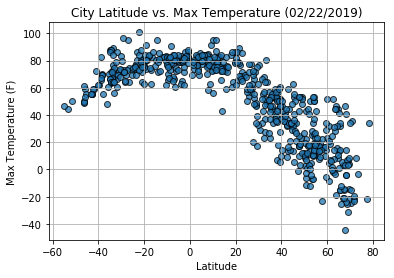

In [8]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], marker='o',edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({analysis_date})")
plt.grid()

plt.savefig("Lat_vs_Max_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

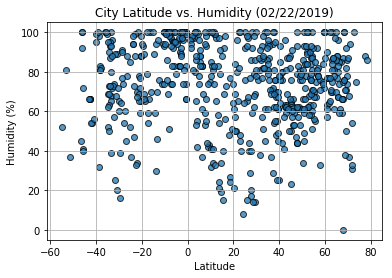

In [9]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], marker='o',edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.grid()

plt.savefig("Lat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

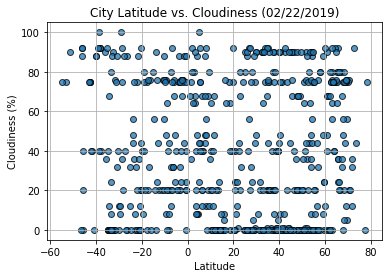

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker='o',edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.grid()

plt.savefig("Lat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

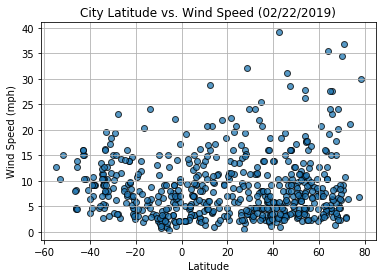

In [11]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker='o',edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.grid()

plt.savefig("Lat_vs_Wind_Speed.png")

plt.show()


### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, there do seem to be clusters around 0, 20, 75, and 95 percent cloudiness throughout all latitudes.
* There is no strong relationship between latitude and wind speed. Most cities are currently having fairly low wind speeds with a few cities in the northern hempisphere are having higher wind speeds.
* There is no strong relationship between latitude and humidity. However, it appears that a majority of cities are experiencing over 50% humidity, with a large portion being close to 100%. 